# Stack Overflow Data Analysis
##### Here is my attempt at analyzing Data from 2022 Stack OverFlow Developer Survey.

#### Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#### Obtaining Data and Cleaning it

In [3]:
df = pd.read_csv("survey_results_public.csv")

In [4]:
df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

##### Since we're doing simple analysis on Salary Prediction, we don't need a lot of those columns. So we're just gonna choose the following
1. Country
2. EdLevel
3. YearsCodePro
4. Employment
5. ConvertedCompyYearly

In [5]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
#only selected the above columns
df = df.rename({"ConvertedCompYearly" : "Salary"}, axis=1)
#renamed ConvertedCompYearly
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time",NaN


In [6]:
df = df[df["Salary"].notnull()]
#removed all the null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38071 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       38071 non-null  object 
 1   EdLevel       38054 non-null  object 
 2   YearsCodePro  37935 non-null  object 
 3   Employment    38067 non-null  object 
 4   Salary        38071 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


In [8]:
df = df.dropna()
#removed all NA values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37919 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       37919 non-null  object 
 1   EdLevel       37919 non-null  object 
 2   YearsCodePro  37919 non-null  object 
 3   Employment    37919 non-null  object 
 4   Salary        37919 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


In [10]:
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

##### Our goal is to find the salary of those who have full-time job, so we don't need those rows in dataframe that do not have full time job.

In [11]:
df = df[df["Employment"] == "Employed, full-time"]
#we are only taking in the data of those who're full-time employed
df = df.drop("Employment", axis=1) # and then we kind of don't need that column since all data is same
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31382 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       31382 non-null  object 
 1   EdLevel       31382 non-null  object 
 2   YearsCodePro  31382 non-null  object 
 3   Salary        31382 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [12]:
df["Country"].value_counts()

Country
United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
                                                        ... 
Haiti                                                      1
Zambia                                                     1
Suriname                                                   1
Somalia                                                    1
Seychelles                                                 1
Name: count, Length: 155, dtype: int64

##### As you can see above, there are a lot of country with single data point in entire DataFrame. Machine Learning models don't like that so what we're going to do it set a limit of 400. What that means is, only Countries who have atleast 400 data points in the DataFrame will be allowed in it.

In [13]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

# since a lot of country have a little data, so wee need a lower limit.

In [14]:
country_map = shorten_categories(df.Country.value_counts(), 400)
# we chosee 400 as that lower limit
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
Other                                                   8643
United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
France                                                  1126
Brazil                                                  1014
Spain                                                    858
Netherlands                                              701
Australia                                                700
Italy                                                    667
Poland                                                   572
Sweden                                                   561
Russian Federation                                       425
Switzerland                                              416
Name: count, dty

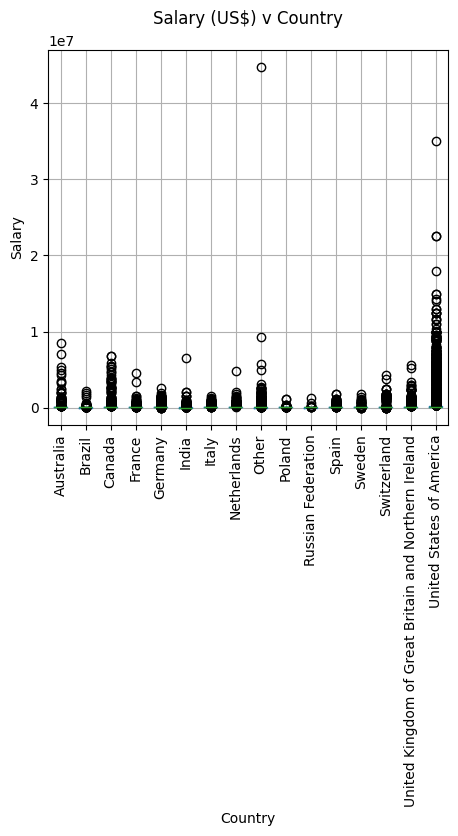

In [15]:
fig, ax  = plt.subplots(1,1, figsize=(5,5))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

##### Above you can see that,
There are a lot of outliers in our DataFrame which is not good for most machine learning models. What we're gonna do is try to attempt to remove those by again setting a limit.

In [16]:
df = df[df['Salary'] <= 250000]
df = df[df['Salary'] >= 10000]
df = df[df['Country'] != 'Other']

# we removed the outliers

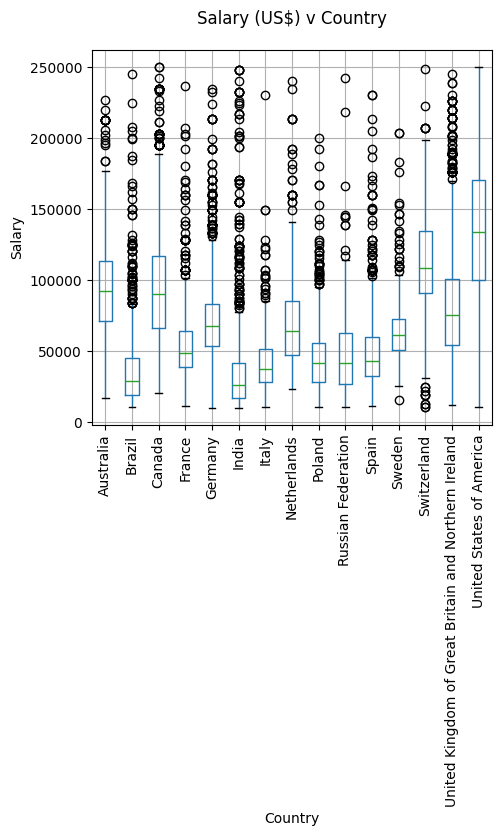

In [18]:
fig, ax  = plt.subplots(1,1, figsize=(5,5))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [188]:
df['YearsCodePro'].unique()

array(['5', '6', '2', '4', '20', '9', '14', '21', '15', '25', '3', '10',
       '8', '12', '7', '19', '17', '24', '1', '11', '23',
       'Less than 1 year', '18', '37', '46', '22', '32', '13', '27', '28',
       '16', '31', '34', '35', '26', '42', '38', '30', '36', '40', '41',
       '29', '33', '39', '48', '45', '44', '43', 'More than 50 years',
       '47', '49', '50'], dtype=object)

##### Above you can see that,
All the values are strings, we can easily convert them all to integers for better analysis.

In [19]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)
# we turned the string values of experience into integers

In [20]:
df['EdLevel'].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Something else',
       'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

##### Values of this column are too big and complicated, we don't need that long strings for analysis so we can just shorten them like this.

In [191]:
mapping = {
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master',
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor',
}
# The names are too long, it will be difficult to manage so we change them into something shorter
# Use the replace method to replace the values in the 'EdLevel' column
df['EdLevel'] = df['EdLevel'].replace(mapping)

In [192]:
def clean_education(x):
    if "Bachelor" in x:
        return "Bachelors degree"
    if "Master" in x:
        return "Masters degree"
    if "Professional" in x or "Other doctoral" in x:
        return "Post grad"
    return "Less than a bachelors"

df["EdLevel"] = df["EdLevel"].apply(clean_education)

# now the education level columns is cleaned

In [193]:
df['EdLevel'].unique()

array(['Masters degree', 'Bachelors degree', 'Less than a bachelors',
       'Post grad'], dtype=object)

##### Now that we've cleaned education column, we can go ahead and use Scikit-Learn's Label Encoder to encode all the string values into integers.

In [194]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()
#le.classes_
# transforming string values to unique values of education level

array([2, 0, 1, 3])

In [195]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

# fitted and transformed the Country Column and everything is a number now

array([13,  7, 14,  6,  2,  4,  8,  3,  1, 11, 10,  5, 12,  0,  9])

##### We will divide our data into dependent variable and independent variable. Since we're gonna predict the salary, `Salary` is going to be our dependent variable `y`

In [196]:
X = df.drop("Salary", axis=1)
y = df["Salary"]
# now X is our dependent variable and y is our independent variable

### Using Machine Learning Models to predict the salary.
#### Linear Regression

In [197]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)
# we are gonna try linear regression model

LinearRegression()

In [198]:
y_pred = linear_reg.predict(X)

In [199]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))
# checking the error from linear regression

In [200]:
error

44689.67485721425

#### Decision Tree Regressor

In [201]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state = 0)
dec_tree_reg.fit(X, y.values)
# the error was too much so let's not try decision tree regressor

DecisionTreeRegressor(random_state=0)

In [202]:
y_pred = dec_tree_reg.predict(X)

In [203]:
error = np.sqrt(mean_squared_error(y, y_pred))

In [204]:
error

33529.79924079139

In [205]:
print("${:,.02f}".format(error))

$33,529.80


#### Random Forest Regressor

In [206]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state = 0)
random_forest_reg.fit(X, y.values)

# the error was again very high. let's try random forest regressor next

RandomForestRegressor(random_state=0)

In [207]:
y_pred = random_forest_reg.predict(X)

In [208]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$33,611.93


##### Using `GridSearchCV` and settling on Decision Tree Regressor 

In [209]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}
regressor = DecisionTreeRegressor(random_state = 0)
gs = GridSearchCV(regressor, parameters, scoring = "neg_mean_squared_error")
gs.fit(X, y.values)

# the error increased again, so we will use Grid Search CV to find the best parameter for Decision Tree Regressor instead

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [210]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

# now we use that best estimator and then fit the model. then we see error which is not going down still. 
# we will just use this one

$34,864.27


In [211]:
X

,Country,EdLevel,YearsCodePro
2,13,2,5.0
8,7,2,6.0
10,13,0,2.0
12,14,0,5.0
21,6,2,4.0
...,...,...,...
73113,14,2,5.0
73116,14,0,16.0
73119,14,0,1.0
73120,10,0,2.0


In [212]:
#country, edlevel, yearscode
X = np.array([["United States of America", "Masters degree", 15]])
X

array([['United States of America', 'Masters degree', '15']], dtype='<U24')

In [213]:
X[:,0] = le_country.transform(X[:,0])
X[:,1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[14.,  2., 15.]])

In [214]:
y_pred = regressor.predict(X)
y_pred

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([162044.17808219])

### Pickling the Machine Learning Model

In [215]:
import pickle

In [216]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [217]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [218]:
y_pred = regressor_loaded.predict(X)
y_pred

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([162044.17808219])

In [219]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
2,13,2,5.0,40205.0
8,7,2,6.0,49056.0
10,13,0,2.0,60307.0
12,14,0,5.0,65000.0
21,6,2,4.0,34126.0
